In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datawrang as dw
import plotly.express as px

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# dataset info
Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

ca: number of major vessels (0-3) colored by flourosopy

oldpeak = ST depression induced by exercise relative to rest

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

```
S.No Attribute Value Description
1 age 29 – 62 age in years
2 sex 0 – male, 1- female gender
3 cp 1-typical angina; 2-atypical angina
3-non-anginal pain; 4-asymptomatic
chest pain type
4 trestbps Numeric value(140mm/Hg) resting blood pressure in mm/Hg
5 chol Numeric value(289mg/dl) serum cholesterol in mg/dl
6 fbs 1-true, 0-false fasting blood pressure>120mg/dl
7 restecg 0-normal, 1-having ST-T, 2-hypertrophy resting electrocardiographic results
8 thalach 140,173 maximum heart rate achieved 
9 exang 1-yes, 0-no exercise induced angina
10 oldpeak Numeric value ST depression induced by exercise relative 
to rest
11 slope 1-upsloping, 2-flat, 3-downsloping the slope of the peak exercise ST segment
12 ca 0-3 vessels number of major vessels colored by 
flourosopy
13 thal 3-normal, 6-fixed defect, 7-reversable defect thalassemia
14 num 0: < 50% diameter narrowing
1: > 50% diameter narrowing
diagnosis of heart disease (angiographic 
disease status)
```

# Plotting Box Plots.

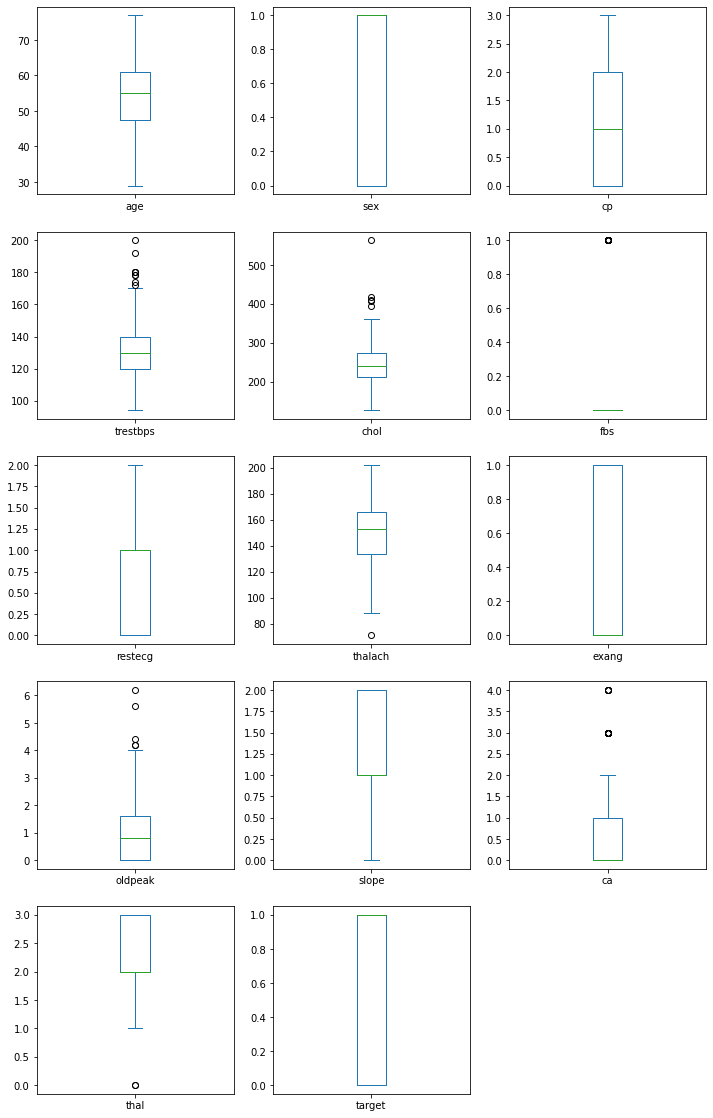

In [4]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,20))
plt.show()
# ignore the boxplot of two classification features we will only cosnider for the continous features.

### Seeing Data Distribution for all features.

***We can see that thal thalach slope are skewed towards left and right respectively.***

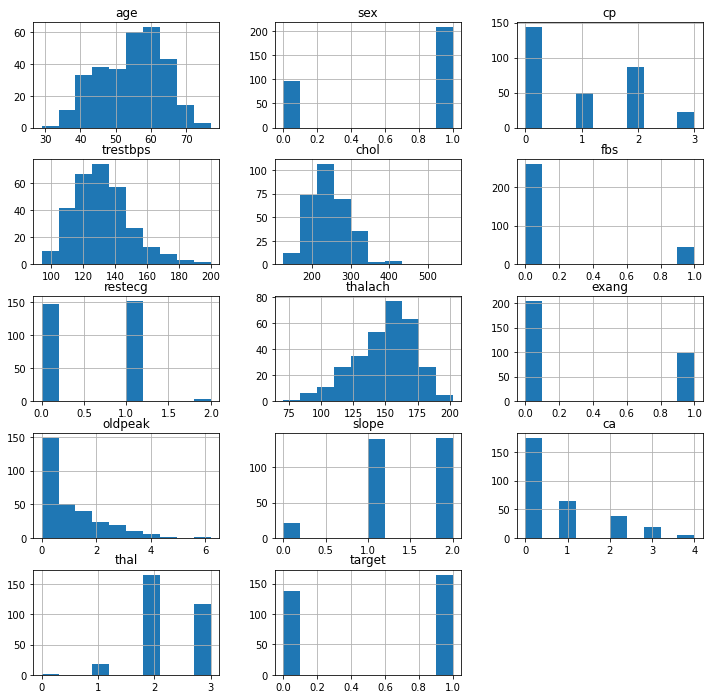

In [5]:
df.hist(figsize=(12,12), layout=(5,3));

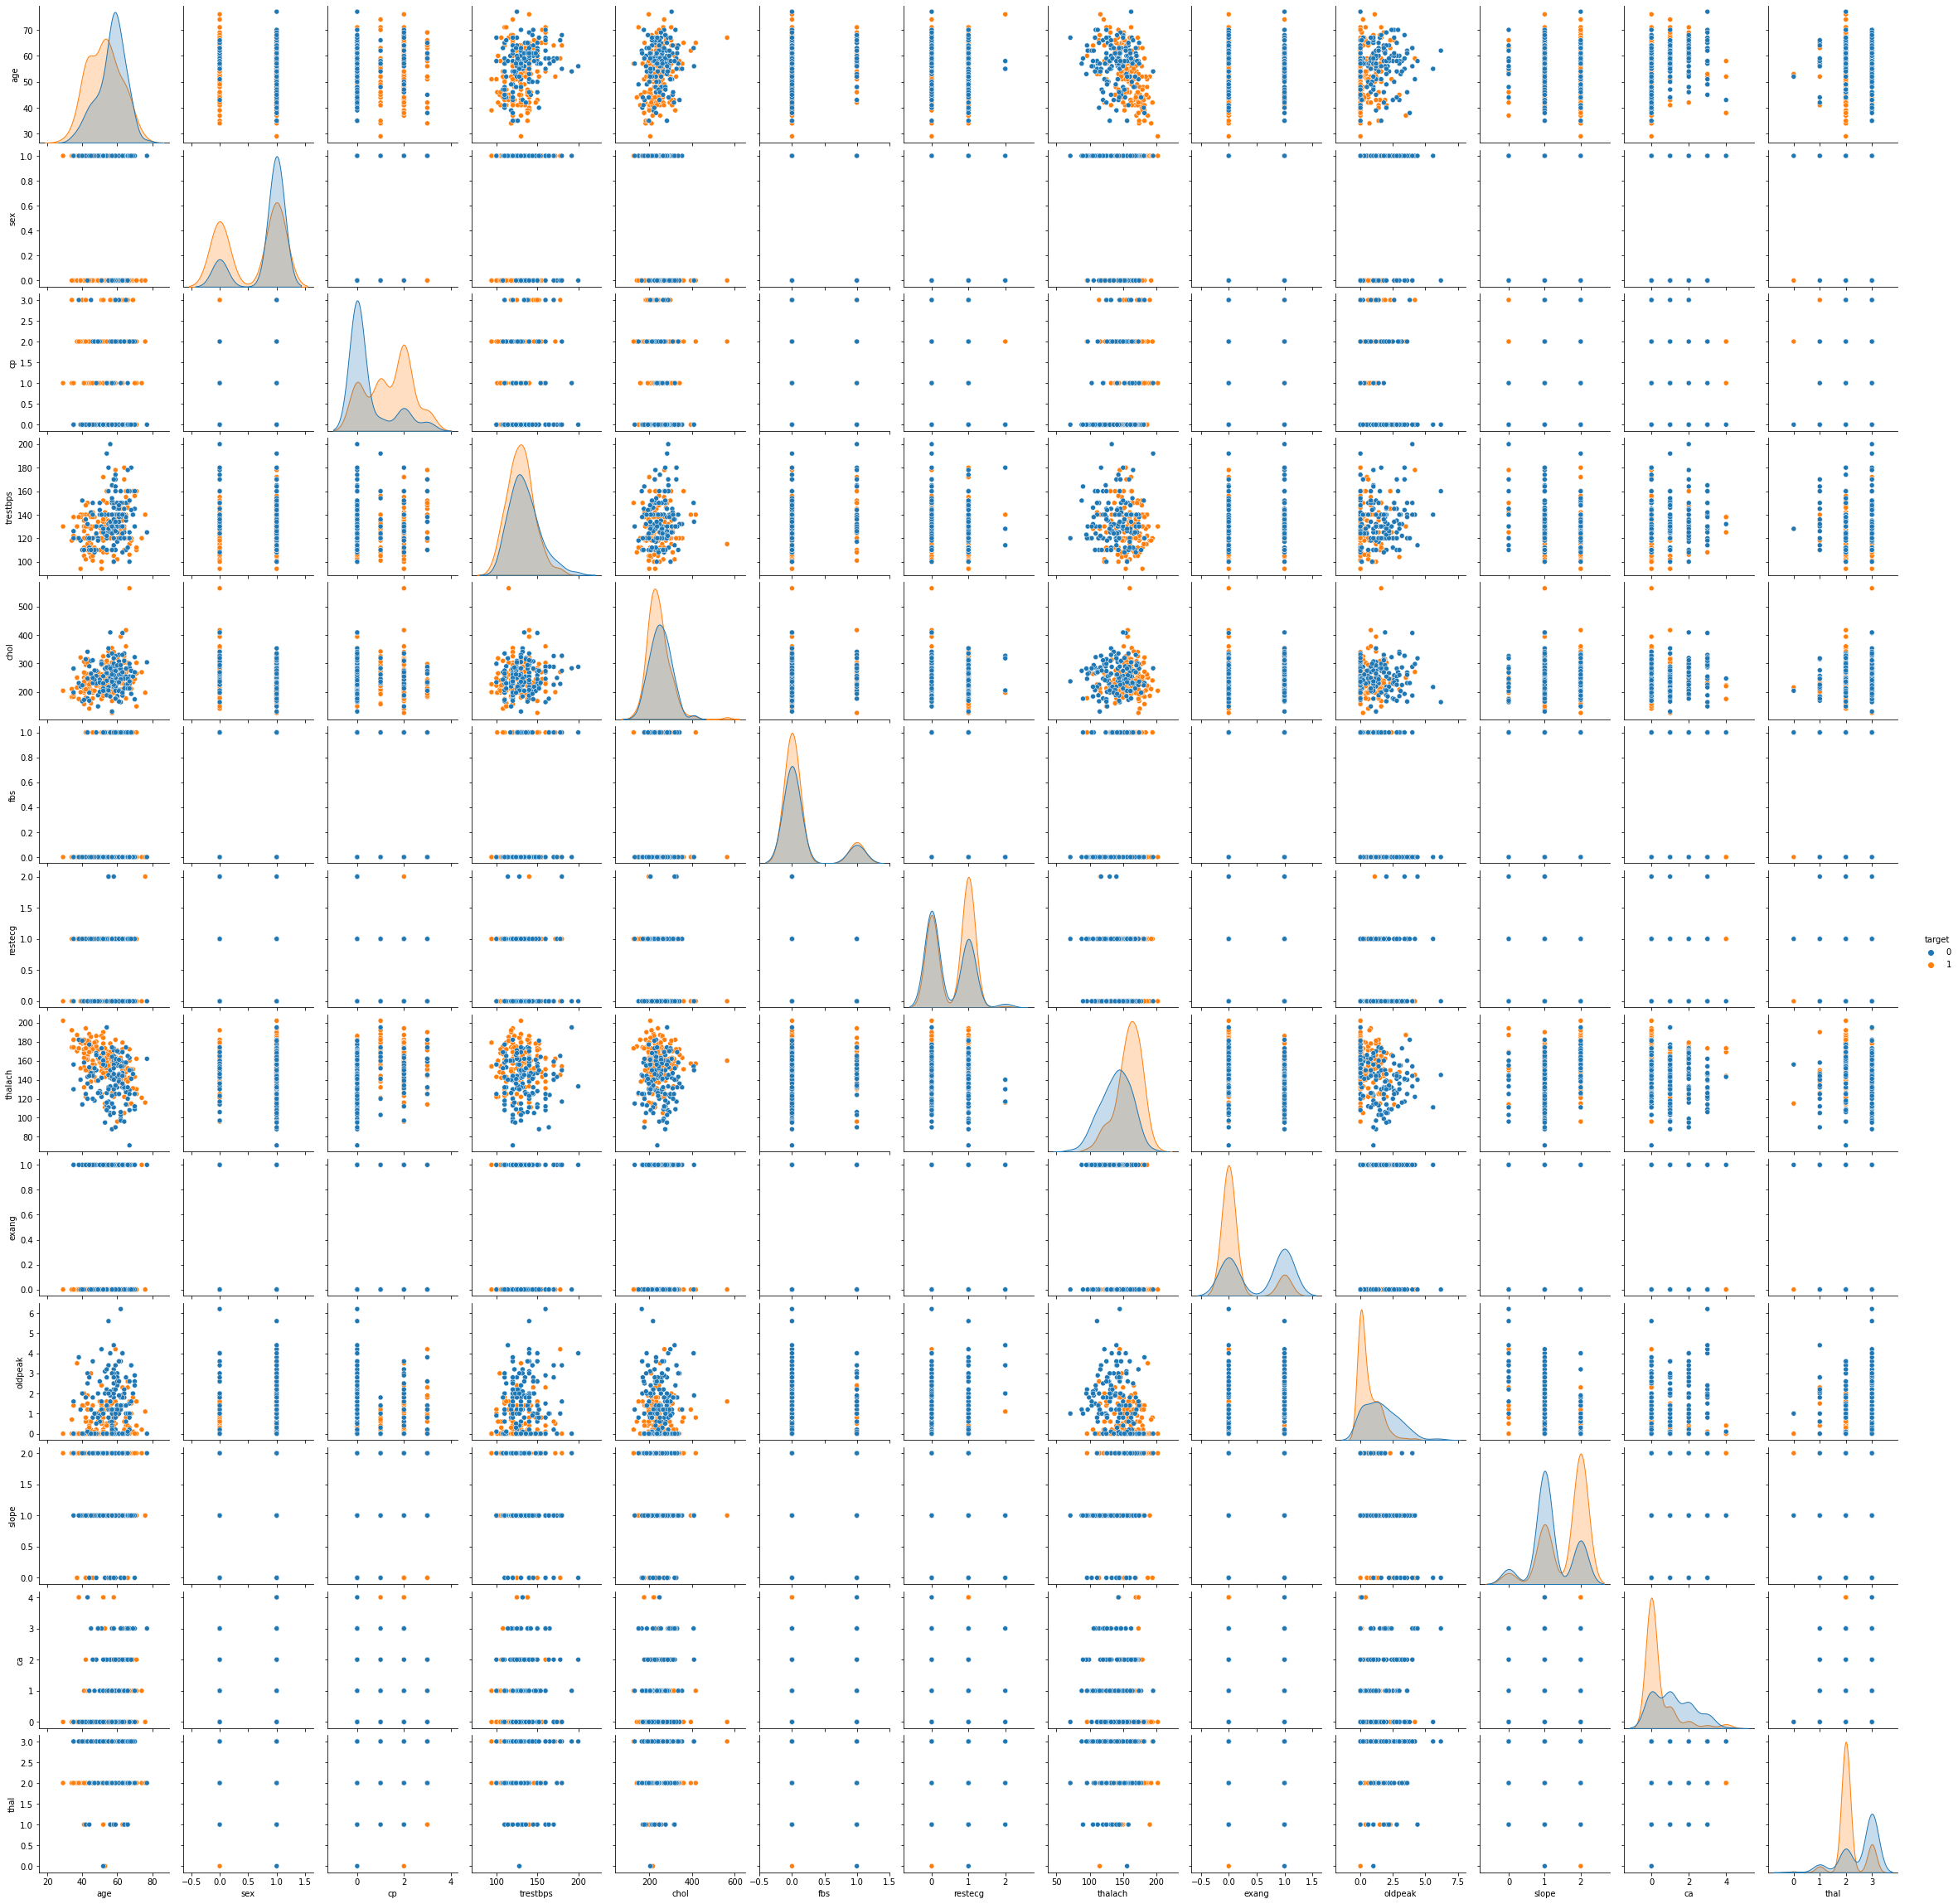

In [6]:
sns.pairplot(data=df, hue = 'target')

# Sex vs Age Heart Dissease

<AxesSubplot:xlabel='sex', ylabel='age'>

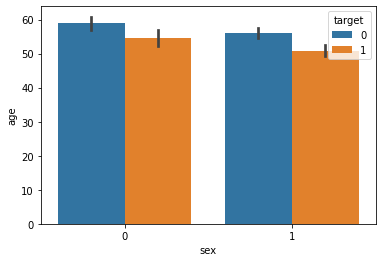

In [7]:
# Target vs Sex shows 
# Target value = 0 => No Presence of heart dissease.
# Target value = 1 => Presence of heart dissease.
sns.barplot(data=df, x='sex', y='age',  hue='target')

In [8]:
gender = pd.crosstab(df['sex'], df['target'])
gender

target,0,1
sex,,
0,24,72
1,114,93


<AxesSubplot:xlabel='sex'>

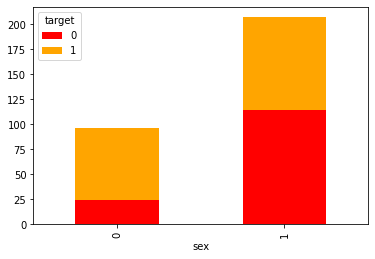

In [9]:
gender.plot(kind='bar', stacked=True, color=['Red','orange'])
# Target value = 0 => No Presence of heart dissease.
# Target value = 1 => Presence of heart dissease.
#sex (1 = male; 0 = female)

<AxesSubplot:ylabel='Frequency'>

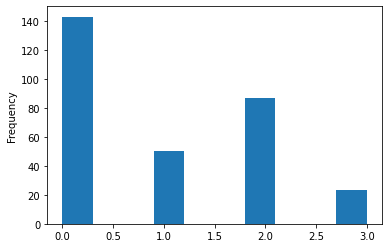

In [10]:
df['cp'].plot(kind = 'hist')

# Lets do some feature creation and removal

1. Handling Missing Values. ✔️
2. Removing Higly Correlated Features ✔️
3. Creating New Features. ✔️

**And yes this is the first dataset i have ever worked on that is not containing any null values.**

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Now lets see which are our categorical feature using my own library datawrang.
But before it lets see the dtypes and basic description of our dataset.

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

***Lets see Which are categorical and which are just continous or having too many multi category.***

In [14]:
dw.Find_Categorical_col(df)

['age',
 'sex',
 'cp',
 'trestbps',
 'fbs',
 'restecg',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

## Lets see value counts for just these features.

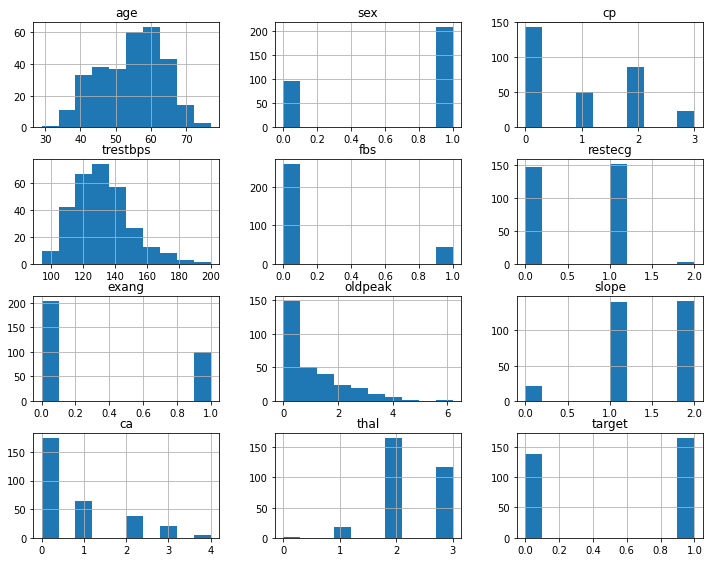

In [15]:
index  = dw.Find_Categorical_col(df)
df[index].hist(figsize=(12,12), layout=(5,3));

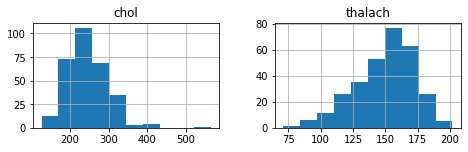

In [16]:
cols = list(df.columns)
for indexes in index:
    cols.remove(indexes)
df[cols].hist(figsize=(12,12), layout=(5,3));

## We will now convert those features which are having too many categories into intervals for better results.

By this we can divide old peak in this manner.
<img src = 'https://www.researchgate.net/profile/Mehdi-Neshat/publication/44260568/figure/tbl2/AS:394234285838372@1471004186898/CLASSIFICATION-OF-OLD-PEAK.png'>

In [17]:
maxval = df['oldpeak'].sort_values(ascending = False).unique()
maxval

array([6.2, 5.6, 4.4, 4.2, 4. , 3.8, 3.6, 3.5, 3.4, 3.2, 3.1, 3. , 2.9,
       2.8, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.6, 1.5, 1.4,
       1.3, 1.2, 1.1, 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1,
       0. ])

In [18]:
bins = pd.IntervalIndex.from_tuples([(-1,1.5), (1.5, 2.55), (2.55,7.0)])
x = pd.cut(df.oldpeak.tolist(),bins)

In [19]:
x.value_counts()

(-1.0, 1.5]    218
(1.5, 2.55]     47
(2.55, 7.0]     38
dtype: int64

In [20]:
x.categories = ['Low','Risk','Terrible']

In [21]:
df['oldpeak_cat'] = x

In [22]:
df['oldpeak_cat']

0          Risk
1      Terrible
2           Low
3           Low
4           Low
         ...   
298         Low
299         Low
300    Terrible
301         Low
302         Low
Name: oldpeak_cat, Length: 303, dtype: category
Categories (3, object): ['Low' < 'Risk' < 'Terrible']

**For Later deployment Purposes** 
# Oldpeak categorization
1. Low => 0.0 to 1.5
2. Risk => 1.5 to 2.55 
3. Terrible => 2.55 to 7.0  

## Similarly i'll do the same for age also and other features also.

In [23]:
x1 = pd.cut(df.age.tolist(),3)

In [24]:
x1

[(61.0, 77.0], (28.952, 45.0], (28.952, 45.0], (45.0, 61.0], (45.0, 61.0], ..., (45.0, 61.0], (28.952, 45.0], (61.0, 77.0], (45.0, 61.0], (45.0, 61.0]]
Length: 303
Categories (3, interval[float64, right]): [(28.952, 45.0] < (45.0, 61.0] < (61.0, 77.0]]

In [25]:
x1.categories = ['adult','old','senior']
df['age_cat'] = x1

# Age Categorization
1. adult => 28.952, 45.0
2. old => 45.0, 61.0
3. senior => 61.0, 77.0

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak_cat,age_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Risk,senior
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Terrible,adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Low,adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Low,old
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Low,old


### Before doing anything further it would be better to check corr-relation and remove features which are correlated more then 90 percent.

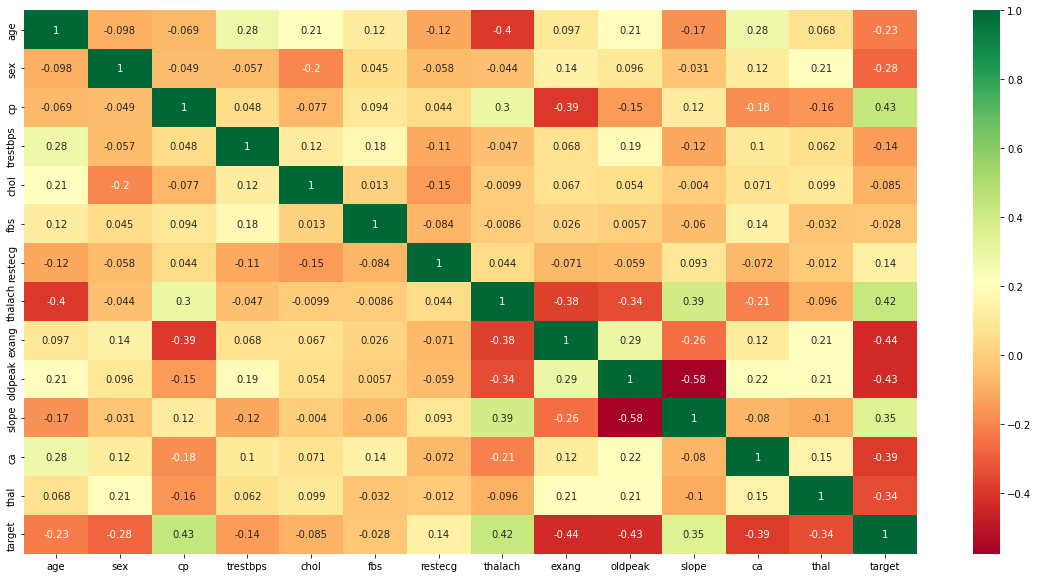

In [27]:
fig = plt.subplots(figsize = (20,10))
sns.heatmap(data = df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

 ***There are no features that are highly co-related hence we can go ahead with our feature creation part***

# So i did Some Extensive Research For Cholestrol
Add your HDL and LDL cholesterol levels, plus 20 percent of your triglycerides, to calculate your serum cholesterol levels. If you have an LDL of 150 mg/dL, HDL of 35 mg/dL, and triglycerides of 180 mg/dL, your serum cholesterol would be 221 mg/dL. That’s considered a borderline high level. Your doctor would see that number as a warning sign and work with you on making changes that will bring your numbers down.

Now as we know this much We know here chol = serum levels we can visually see them using this image.
<img src = "https://www.verywellhealth.com/thmb/aE2evMgTJkNdEqITI7QSAiFnNtc=/1500x1000/filters:no_upscale():max_bytes(150000):strip_icc()/what-is-a-total-cholesterol-level-698073-b6bf870bf8a149bebb755fdcb31aa82c.png">

In [28]:
bins = pd.IntervalIndex.from_tuples([(0,200), (200, 239), (240,600)])
x2 = pd.cut(df.chol.tolist(),3)

In [29]:
x2

[(125.562, 272.0], (125.562, 272.0], (125.562, 272.0], (125.562, 272.0], (272.0, 418.0], ..., (125.562, 272.0], (125.562, 272.0], (125.562, 272.0], (125.562, 272.0], (125.562, 272.0]]
Length: 303
Categories (3, interval[float64, right]): [(125.562, 272.0] < (272.0, 418.0] < (418.0, 564.0]]

In [30]:
x2.value_counts()

(125.562, 272.0]    222
(272.0, 418.0]       80
(418.0, 564.0]        1
dtype: int64

In [31]:
x2.categories = ['Desirable Level','Borderline High Level','High Level']

In [32]:
df['chol_cat'] = x2

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak_cat,age_cat,chol_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Risk,senior,Desirable Level
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Terrible,adult,Desirable Level
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Low,adult,Desirable Level
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Low,old,Desirable Level
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Low,old,Borderline High Level


Please understand that always creating categorical features out of continous features is not a good thing but if you have a knowledge about the dataset which in case because i did some research for this dataset i know what are natural levels and how they are divided in medical feilds that's why i selected these features.

In [34]:
df.drop(['age','chol','oldpeak'],axis =1, inplace= True)

In [35]:
df.head()

,sex,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,target,oldpeak_cat,age_cat,chol_cat
0,1,3,145,1,0,150,0,0,0,1,1,Risk,senior,Desirable Level
1,1,2,130,0,1,187,0,0,0,2,1,Terrible,adult,Desirable Level
2,0,1,130,0,0,172,0,2,0,2,1,Low,adult,Desirable Level
3,1,1,120,0,1,178,0,2,0,2,1,Low,old,Desirable Level
4,0,0,120,0,1,163,1,2,0,2,1,Low,old,Borderline High Level


In [36]:
cols = list(df.columns)
cols.remove('target')
X = df[cols]
y = df['target'] 

All other features are fine lets divide our dataset into train test split.

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [38]:
# Lets create dicts to map values.
indice = df.oldpeak_cat.unique()
dicti = {}
for i in range(len(indice)):
    dicti[indice[i]] = i
print(f'oldpeak_cat \n{dicti}')
indice = df.age_cat.unique()
dict1 = {}
for i in range(len(indice)):
    dict1[indice[i]] = i
print(f'age_cat \n {dict1}')
indice = df.chol_cat.unique()
dict2 = {}
for i in range(len(indice)):
    dict2[indice[i]] = i
print(f'chol_cat \n {dict2}')

oldpeak_cat 
{'Risk': 0, 'Terrible': 1, 'Low': 2}
age_cat 
 {'senior': 0, 'adult': 1, 'old': 2}
chol_cat 
 {'Desirable Level': 0, 'Borderline High Level': 1, 'High Level': 2}


In [39]:
X_train['oldpeak_cat'] = X_train.oldpeak_cat.map(dicti)
X_test['oldpeak_cat'] = X_test.oldpeak_cat.map(dicti)
X_train['age_cat'] = X_train.age_cat.map(dict1)
X_test['age_cat'] = X_test.age_cat.map(dict1)
X_train['chol_cat'] = X_train.chol_cat.map(dict2)
X_test['chol_cat'] = X_test.chol_cat.map(dict2)

In [40]:
X_train.chol_cat.value_counts()

0    173
1     68
2      1
Name: chol_cat, dtype: int64

In [41]:
X_train.head()

,sex,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,oldpeak_cat,age_cat,chol_cat
74,0,2,122,0,1,165,0,1,0,2,2,1,0
153,0,2,146,0,0,152,0,1,1,2,2,0,1
64,1,2,140,1,0,165,0,2,0,2,2,2,0
296,0,0,124,0,1,136,1,1,0,2,2,0,0
287,1,1,154,0,0,164,0,2,1,2,2,2,0


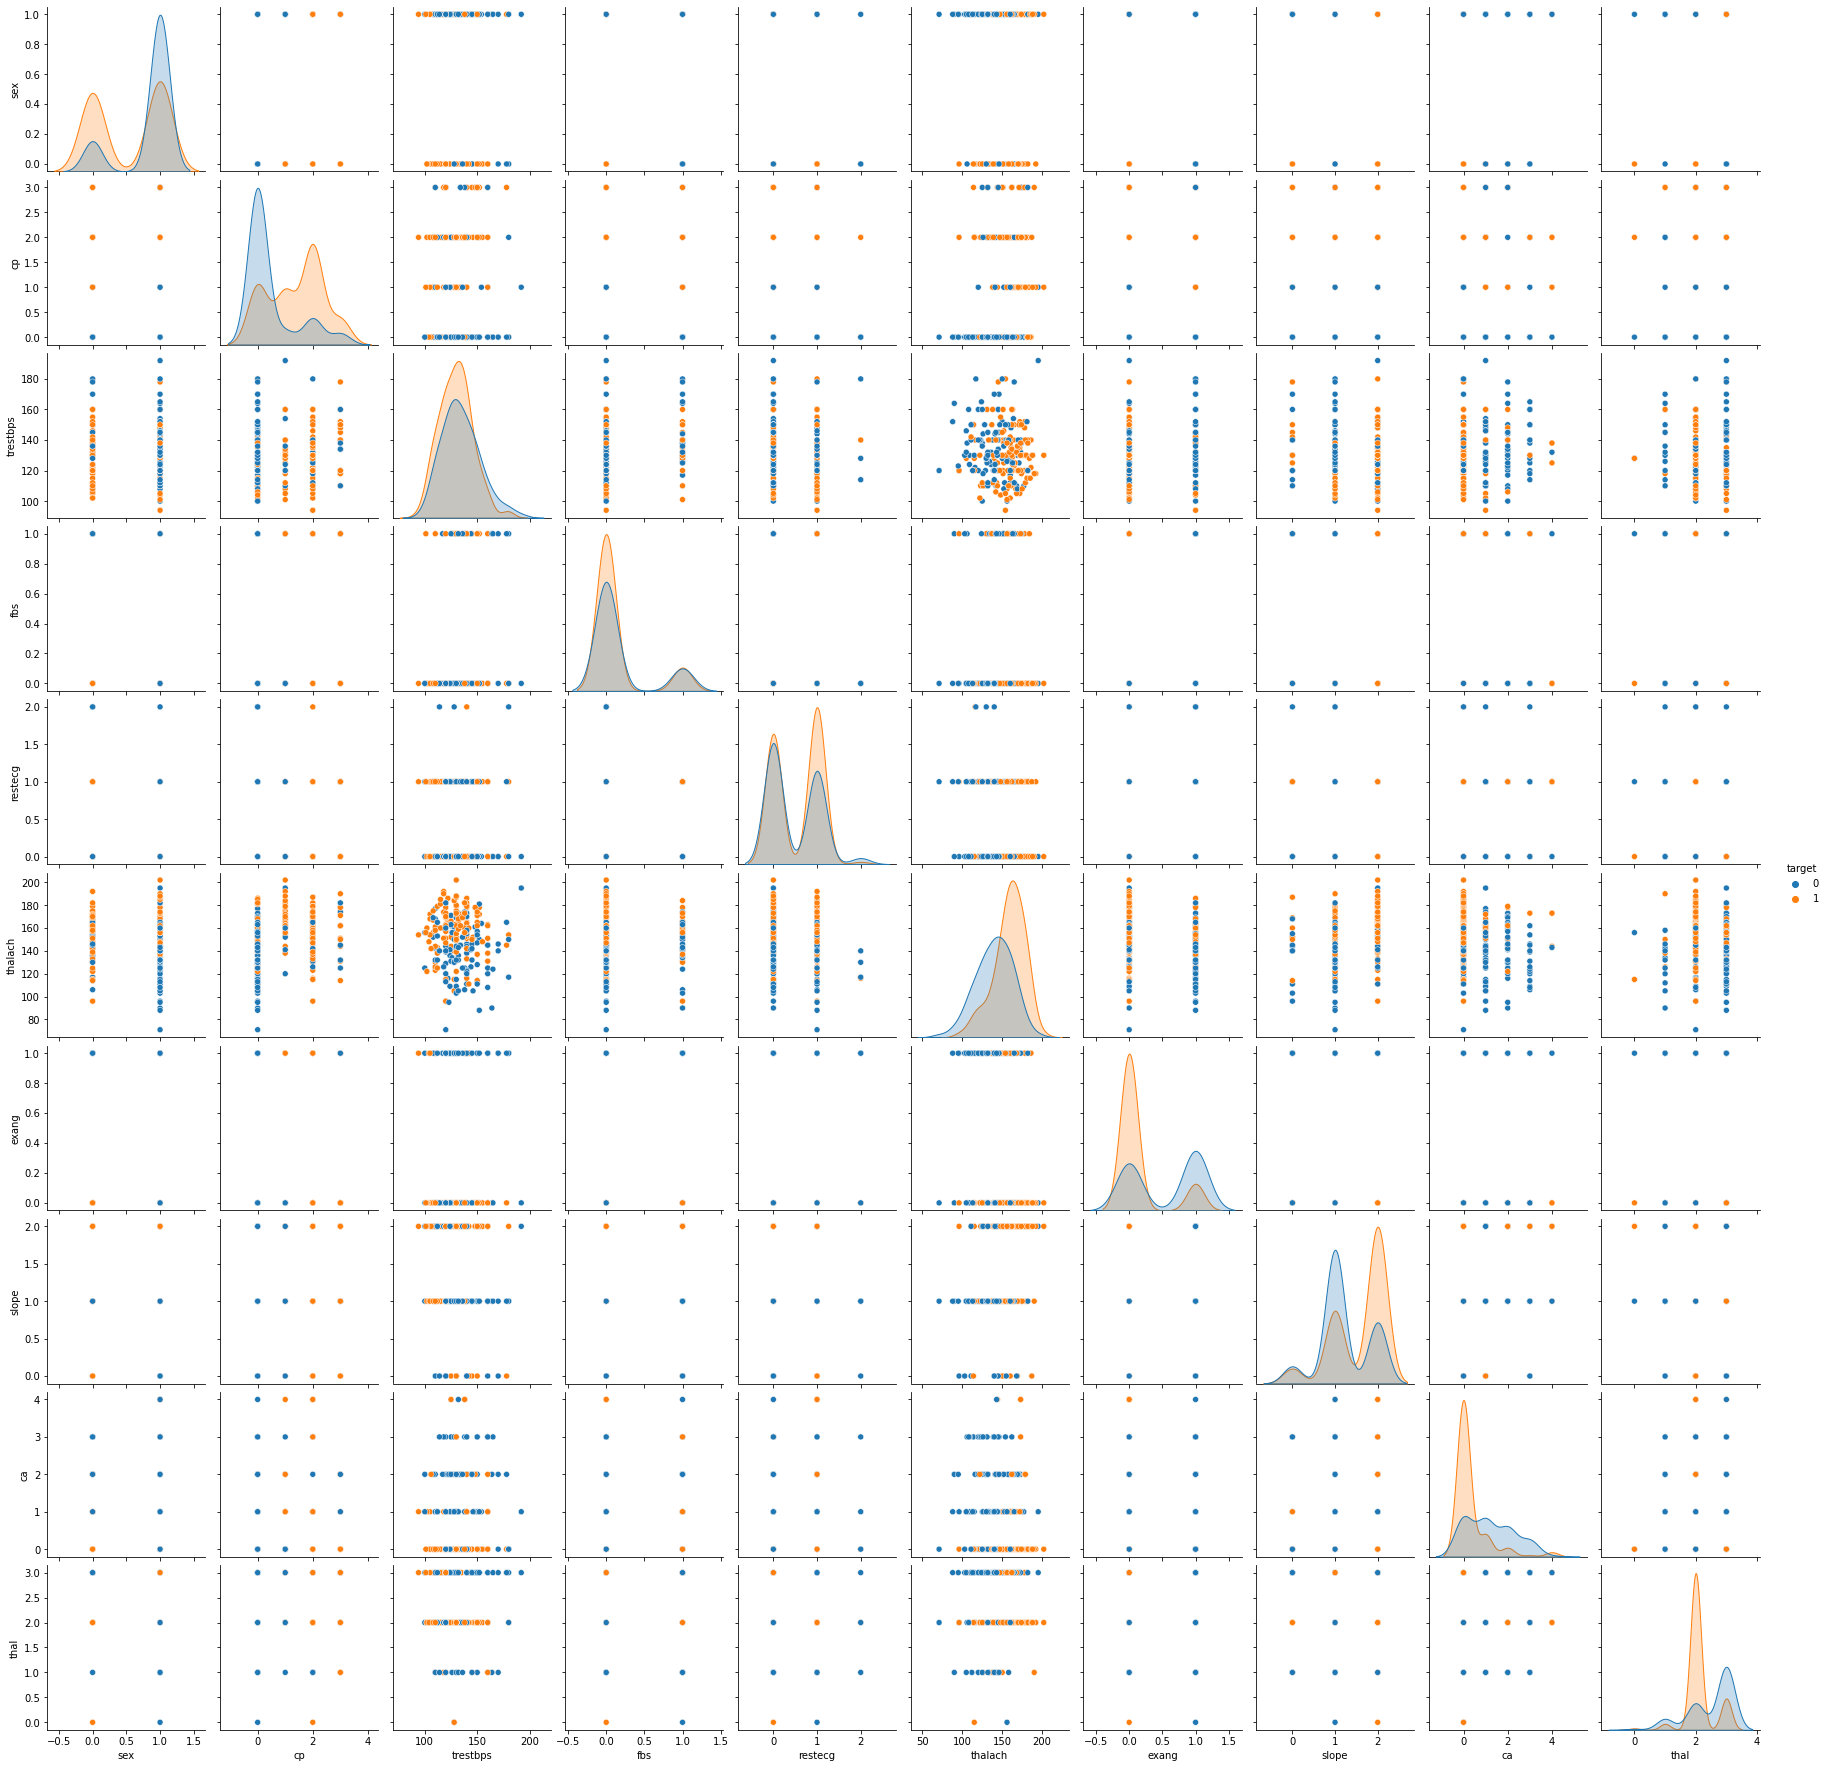

In [42]:
x_check = X_train
x_check['target'] = y_train
sns.pairplot(data=x_check, hue = 'target')
X_train.drop('target',axis = 1,inplace = True)

# Finally Lets Start Applying ML models
1. Lets see how much accuracy we get with ensemble RandomForestClassifier.

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X_train

,sex,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,oldpeak_cat,age_cat,chol_cat
74,0,2,122,0,1,165,0,1,0,2,2,1,0
153,0,2,146,0,0,152,0,1,1,2,2,0,1
64,1,2,140,1,0,165,0,2,0,2,2,2,0
296,0,0,124,0,1,136,1,1,0,2,2,0,0
287,1,1,154,0,0,164,0,2,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1,0,132,1,0,143,1,1,4,3,2,1,0
192,1,0,120,0,1,113,0,1,1,3,2,2,0
117,1,3,120,0,0,162,0,1,0,3,0,2,0
47,1,2,138,0,0,156,0,2,0,2,2,2,0


***Because Pyscript does not support pickle neither it can be loaded using cloud pickle or pyodide because of version diffrerence we will use steps in our notebook to predict outputs that's why we will export our X_train, y_train, X_test, y_test. and also we need to use logistic regression***



In [45]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [46]:
# Also ill use previous dataset for tree models because pipelines cannot be used in py-script or pyodide based frameworks.
x_train = X_train 
x_test = X_test
y_train2 = y_train
y_test2 = y_test

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
pred = rf.predict(X_test)

In [49]:
rf.score(X_train,y_train)

1.0

In [50]:
rf.score(X_test,y_test)

0.819672131147541

In [51]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
print(confusion_matrix(y_test,pred))
from sklearn.metrics import classification_report
cm0 = classification_report(y_test,pred)
print(classification_report(y_test,pred))
# We need to reduce False Negative because 
# we don't want a person having heart dissease to get preidcted as not having heart dissease 
# Target value = 0 => No Presence of heart dissease.
# Target value = 1 => Presence of heart dissease.

[[21  6]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Right now we are having Recall as 0.88 for 1 and 0.78 for 0 that means prediction of our model Recall is lower for 0 and more for 1 which means my model when predicting that the person has presence of heart dissease is actally having lower False Negative meaning its good. 

OR 

F1 score when we are analysing we can see that for 0 we are having low score and 1 we are having high score that means even if the person is not having heart dissease it will predict heart dissease which is ok as the person can go and do some other dignosis.

In [52]:
FP = confusion_matrix(y_test,pred).sum(axis=0) - np.diag(confusion_matrix(y_test,pred))  
FN = confusion_matrix(y_test,pred).sum(axis=1) - np.diag(confusion_matrix(y_test,pred))
TP = np.diag(confusion_matrix(y_test,pred))
TN = confusion_matrix(y_test,pred).sum() - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [53]:
print(TPR) # RECALL 

[0.77777778 0.85294118]


In [54]:
X_train.dtypes

sex               int64
cp                int64
trestbps          int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
slope             int64
ca                int64
thal              int64
oldpeak_cat    category
age_cat        category
chol_cat       category
dtype: object

In [55]:
# for xg boost we need to convert them

In [56]:
X_train['oldpeak_cat'] = X_train['oldpeak_cat'].astype(float)
X_test['oldpeak_cat'] = X_test['oldpeak_cat'].astype(float)
X_train['age_cat'] = X_train['age_cat'].astype(int)
X_test['age_cat'] = X_test['age_cat'].astype(int)
X_train['chol_cat'] = X_train['chol_cat'].astype(float)
X_test['chol_cat'] = X_test['chol_cat'].astype(float)

# Lets try Xg boost Algorithm 

In [57]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [58]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
preds = xgb_model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.819672131147541

In [61]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,preds).ravel()
cm1 = classification_report(y_test,preds)
print(confusion_matrix(y_test,preds))
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))
# Not good as we are not getting a good f1 score.

[[23  4]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Lets Try Naive Bayes Algorithm

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
prediction_nb = nb.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction_nb,y_test)

0.8524590163934426

In [64]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,prediction_nb).ravel()
print(confusion_matrix(y_test,prediction_nb))
from sklearn.metrics import classification_report
cm2 = classification_report(y_test,prediction_nb)
print(classification_report(y_test,prediction_nb))
# Its  better Clearly in every terms

[[21  6]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



# Lets Try Logistic Regression Algorithm

In [65]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['trestbps','thalach']
X_train[columns_to_scale] = StandardScaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = StandardScaler.fit_transform(X_test[columns_to_scale])

In [66]:
X_train.head()

,sex,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,oldpeak_cat,age_cat,chol_cat
74,0,2,-0.574125,0,1,0.656262,0,1,0,2,2.0,1,0.0
153,0,2,0.831066,0,0,0.094007,0,1,1,2,2.0,0,1.0
64,1,2,0.479768,1,0,0.656262,0,2,0,2,2.0,2,0.0
296,0,0,-0.457026,0,1,-0.597999,1,1,0,2,2.0,0,0.0
287,1,1,1.299463,0,0,0.613011,0,2,1,2,2.0,2,0.0


In [67]:
X_test.head()

,sex,cp,trestbps,fbs,restecg,thalach,exang,slope,ca,thal,oldpeak_cat,age_cat,chol_cat
225,1,0,0.738068,0,1,-1.097075,1,0,0,3,1.0,0,0.0
152,1,3,2.046851,0,0,0.278026,0,1,0,3,2.0,0,0.0
228,1,3,2.046851,0,0,0.461373,0,1,0,3,2.0,2,1.0
201,1,0,-0.308959,0,0,-0.363688,1,1,1,3,1.0,2,0.0
52,1,2,-0.047202,0,1,-0.134504,0,1,3,3,0.0,0,0.0


In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
prediction_lr = lr.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction_lr,y_test)

0.8524590163934426

In [71]:
from sklearn.metrics import classification_report
cm3 = classification_report(y_test,prediction_lr)
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [72]:
print(f'RandomForestClassifier: \n {cm0} \n Xg boost Algorithm: \n {cm1}\n NaiveBayes(GaussianNB) Algorithm:\n {cm2} \n Logistic Regression:\n {cm3} ')

RandomForestClassifier: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61
 
 Xg boost Algorithm: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

 NaiveBayes(GaussianNB) Algorithm:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.8

# HYPER PARAMETERS 
1. Random Forest Params
2. Logistic Regression Params
3. Naive Bayes Params
4. Classification Reports for all

In [73]:
# Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num  = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [74]:
random_grid = {'n_estimators':n_estimators,
'max_features' :max_features,
'max_depth' :max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf' :min_samples_leaf
}

In [75]:
# Logistic Regression Parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [76]:
# Logistic params
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [77]:
# Naive Bayes parameters
nb_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [78]:
from sklearn.model_selection import RandomizedSearchCV
random_nb = RandomizedSearchCV(estimator = nb,param_distributions = nb_grid,scoring = 'accuracy',n_iter=10,n_jobs=1,cv=5,verbose=2)
random_nb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-06; total time=   0.0s
[CV] END ................................var_smoothing=1e-06; total time=   0.0s
[CV] END ................................var_smoothing=1e-06; total time=   0.0s
[CV] END ................................var_smoothing=1e-06; total time=   0.0s
[CV] END ................................var_smoothing=1e-06; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='accuracy', verbose=2)

In [79]:
random_rf = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,scoring = 'accuracy',n_iter=10,n_jobs=1,cv=5,verbose=2)
random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='accuracy', verbose=2)

In [80]:
random_lr = RandomizedSearchCV(estimator = lr,param_distributions = lr_grid,scoring = 'accuracy',n_iter=10,n_jobs=1,cv=5,verbose=2)
random_lr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy', verbose=2)

In [81]:
pred_hyper1 = random_nb.predict(X_test)
pred_hyper2 = random_rf.predict(X_test)
pred_hyper3 = random_lr.predict(X_test)
from sklearn.metrics import classification_report
print(f'Naive Bayes After Hyperparmater Tuning\n{classification_report(y_test,pred_hyper1)}')
print(f'Random Forest After Hyperparmater Tuning\n{classification_report(y_test,pred_hyper2)}')
print(f'Logistic Regression After Hyperparmater Tuning\n{classification_report(y_test,pred_hyper3)}')


Naive Bayes After Hyperparmater Tuning
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

Random Forest After Hyperparmater Tuning
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Logistic Regression After Hyperparmater Tuning
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
 

We can see after doing hyper parameter tuning that random forest is doing good. We can also use Logistic Regression or Random Forest as they both are giving same results. 

In [82]:
random_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf_new = RandomForestClassifier(n_estimators = 400, min_samples_split = 15, max_depth = 15, min_samples_leaf = 5)

In [84]:
rf_new.fit(x_train,y_train2)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=15,
                       n_estimators=400)

In [85]:
rf_new.score(x_test,y_test2)

0.8852459016393442

In [86]:
predictfinal = rf_new.predict(x_test)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predictfinal))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [88]:
# Lets Save this model
import pickle
file = open('mainmodel.pkl', 'wb')
pickle.dump(rf_new,file)

In [94]:
file.close()

In [93]:
y_test2

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64